In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# on the left side click Files, then "upload to session storage" the 4 files 

In [4]:
train_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_labels.csv')

In [5]:
test_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_images.csv', header=None, names=train_images.columns)
test_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_labels.csv')

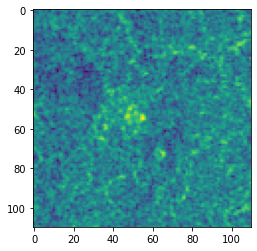

In [6]:
train_labels.fillna(value=0,inplace=True)
test_labels.fillna(value=0,inplace=True)

train_labels = train_labels.iloc[:, 0].to_numpy()
test_labels = test_labels.iloc[:, 0].to_numpy()

first = train_images.iloc[0].to_numpy()
first = first.reshape(110, 110)
plt.imshow(first);


##Standardize and Reshape Images

In [7]:
train_images_reshaped = train_images.values.reshape(len(train_images), 110, 110)
train_images_reshaped = train_images_reshaped / 255.0

In [8]:
test_images_reshaped = test_images.values.reshape(len(test_images), 110, 110)
test_images_reshaped = test_images_reshaped / 255.0

In [9]:
train_images_reshaped2 = train_images_reshaped
test_images_reshaped2 = test_images_reshaped


##Balance the Dataset a Bit and Augment Images

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# pick random images
n = [random.randrange(0, train_images_reshaped.shape[0]) for _ in range(train_images_reshaped.shape[0]//3)]

to_append = []

for index in n:

  image = train_images_reshaped[index]
  image = np.expand_dims(image, axis=0)

  augmented_image = data_augmentation(image)
  to_append.append(augmented_image)

  #ax = plt.subplot(3, 3, i + 1)
  #plt.imshow(np.squeeze(augmented_image))
  #plt.show()

train_images_reshaped = np.append(train_images_reshaped, to_append)

#for image in to_append:
#  train_images_reshaped = np.concatenate((train_images_reshaped, image), axis=0)

In [11]:
train_images_reshaped = tf.convert_to_tensor(train_images.values.reshape(len(train_images), 110, 110, 1))
test_images_reshaped = tf.convert_to_tensor(test_images.values.reshape(len(test_images), 110, 110, 1))

##Create the Model

In [25]:
    model = Sequential()
    
    model.add(Conv2D(64, (2, 2),  input_shape=(110,110, 1),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3))
    
    model.add(Conv2D(96, (4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.45))

    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.4))

    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.35))
    model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy', "Precision", "Recall"])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 51, 51, 96)        98400     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 96)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 25, 25, 96)       

##Train the Model

In [27]:
history = model.fit(train_images_reshaped, train_labels, epochs=55, 
                    validation_data=(test_images_reshaped, test_labels),
                    batch_size=32)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/55
219/219 [==============================] - 19s 80ms/step - loss: 0.8410 - accuracy: 0.8494 - precision: 0.1625 - recall: 0.0130 - val_loss: 0.5696 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/55
219/219 [==============================] - 17s 76ms/step - loss: 0.4306 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6088 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/55
219/219 [==============================] - 17s 76ms/step - loss: 0.4794 - accuracy: 0.8564 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5022 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/55
219/219 [==============================] - 17s 76ms/step - loss: 0.4443 - accuracy: 0.8570 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4715 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/55
219/219 [====================

##Evaluate the Model

In [29]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)

86/86 [==============================] - 2s 27ms/step - loss: 0.1398 - accuracy: 0.9583 - precision: 0.9790 - recall: 0.7535
Test accuracy: 0.9583028554916382
Test precision: 0.9790419340133667
Test recall: 0.7534562349319458


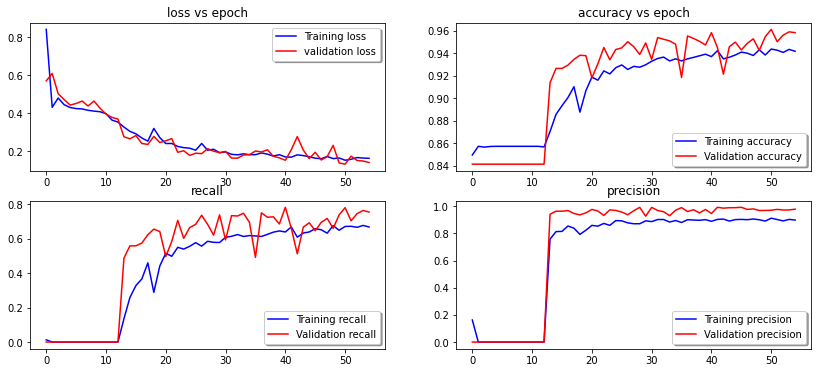

In [30]:
def plotLearningCurves(history):
    fig, ax = plt.subplots(2,2, figsize = (14,6))
    ax[0,0].plot(history.epoch, history.history['loss'], color='b', label="Training loss")
    ax[0,0].plot(history.epoch, history.history['val_loss'], color='r', label="validation loss")
    ax[0,0].legend(loc='best', shadow=True)
    ax[0,0].set_title('loss vs epoch')

    ax[0,1].plot(history.epoch, history.history['accuracy'], color='b', label="Training accuracy")
    ax[0,1].plot(history.epoch, history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[0,1].legend(loc='best', shadow=True)
    ax[0,1].set_title('accuracy vs epoch')

    ax[1,0].plot(history.epoch, history.history['recall'], color='b', label="Training recall")
    ax[1,0].plot(history.epoch, history.history['val_recall'], color='r',label="Validation recall")
    ax[1,0].legend(loc='best', shadow=True)
    ax[1,0].set_title('recall')

    ax[1,1].plot(history.epoch, history.history['precision'], color='b', label="Training precision")
    ax[1,1].plot(history.epoch, history.history['val_precision'], color='r',label="Validation precision")
    ax[1,1].legend(loc='best', shadow=True)
    ax[1,1].set_title('precision')

plotLearningCurves(history)

In [31]:

# do this to fine tune
#model.trainable = False

df = pd.DataFrame.from_dict(history.history)

df[df['val_accuracy'] > .9].sort_values(by="val_accuracy", ascending=False)

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
50,0.151793,0.943714,0.912807,0.670,0.131156,0.961229,0.971264,0.778802
53,0.163354,0.943429,0.903743,0.676,0.147862,0.959034,0.973529,0.762673
54,0.162048,0.941714,0.898922,0.667,0.139842,0.958303,0.979042,0.753456
40,0.169085,0.937000,0.889819,0.638,0.151638,0.958303,0.946927,0.781106
52,0.165942,0.940714,0.892617,0.665,0.150591,0.956108,0.972892,0.744240
36,0.190416,0.935000,0.901325,0.612,0.195404,0.955377,0.961538,0.748848
49,0.163781,0.938429,0.891334,0.648,0.137520,0.954645,0.969697,0.737327
31,0.183011,0.935286,0.902798,0.613,0.163153,0.953914,0.969512,0.732719
37,0.183937,0.936286,0.899135,0.624,0.206832,0.953182,0.975155,0.723502
47,0.171695,0.938000,0.906609,0.631,0.170601,0.952816,0.981073,0.716590
